In [2]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
conda install numpy

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c intel mkl

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Note: you may need to restart the kernel to use updated packages.


In [5]:
G = ox.graph_from_place('London', network_type='drive')

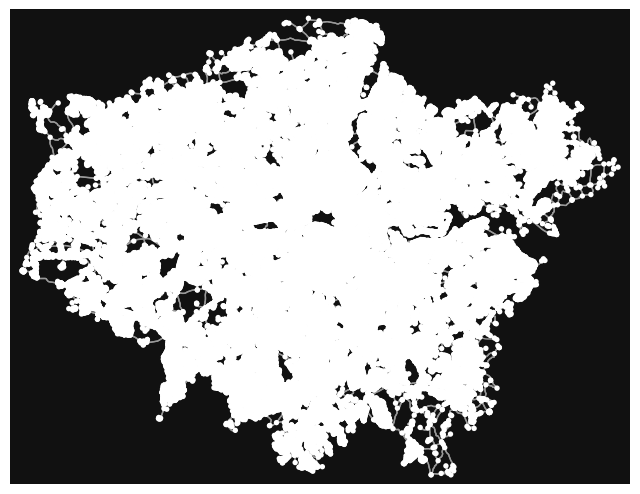

In [6]:
fig, ax = ox.plot_graph(G)

**Import dataset**

In [7]:
df = pd.read_csv('london_weekends.csv')

In [8]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.shape

(5379, 19)

In [11]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000
mean,364.389747,2.857966,0.279792,0.357873,9.193902,90.921175,1.133110,5.327620,1.016534,294.575060,20.477061,625.612765,11.197378,-0.114782,51.503457
std,437.742534,1.251068,0.448939,0.479419,1.151321,11.289857,0.577676,2.705986,1.265193,170.516734,11.853283,388.206414,6.948218,0.067520,0.031966
min,54.328653,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040561,0.013875,68.740518,4.778421,140.521722,2.515094,-0.251700,51.414400
25%,174.510219,2.000000,0.000000,0.000000,9.000000,87.000000,1.000000,3.545684,0.324035,177.224481,12.319565,382.129695,6.839456,-0.169960,51.485690
50%,268.115431,2.000000,0.000000,0.000000,10.000000,94.000000,1.000000,4.939138,0.536131,247.646069,17.214844,527.347208,9.438596,-0.118130,51.509640
75%,438.274654,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.838065,1.090765,361.070549,25.099422,764.221221,13.678228,-0.067725,51.525720
max,12937.275101,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321199,9.174094,1438.561236,100.000000,5587.136047,100.000000,0.120180,51.575820


**EDA**

Text(0, 0.5, 'Probability')

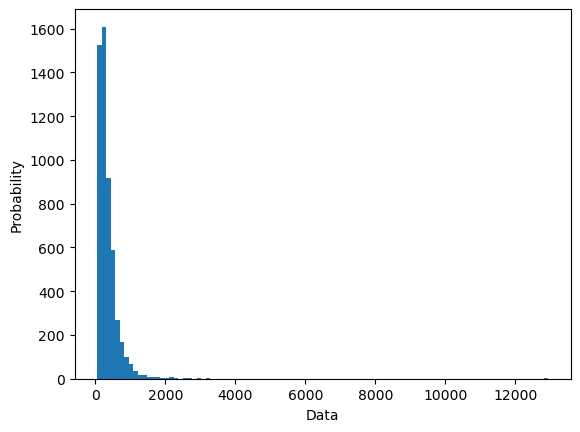

In [12]:
prices = df['realSum'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [13]:
df = df[df['realSum'] < df['realSum'].quantile(.99)]

Text(0, 0.5, 'Probability')

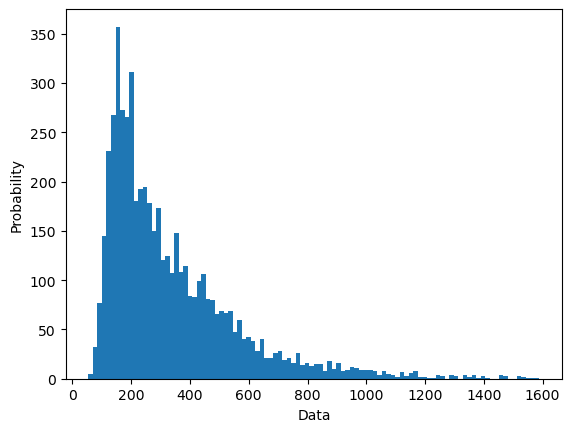

In [14]:
prices = df['realSum'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [15]:
df.shape

(5325, 19)

In [16]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,5325.000000,5325.000000,5325.000000,5325.000000,5325.00000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000
mean,337.182328,2.838498,0.278873,0.357746,9.19061,90.881878,1.122629,5.350772,1.022484,292.338357,20.321579,621.116957,11.116911,-0.114644,51.503405
std,229.444980,1.234453,0.448487,0.479382,1.14890,11.278380,0.564895,2.701776,1.269934,167.406388,11.637071,382.866711,6.852647,0.067685,0.032084
min,54.328653,2.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.040561,0.013875,68.740518,4.778421,140.521722,2.515094,-0.251700,51.414400
25%,174.510219,2.000000,0.000000,0.000000,9.00000,87.000000,1.000000,3.562482,0.325252,176.923962,12.298674,381.443579,6.827175,-0.170460,51.485470
50%,265.057974,2.000000,0.000000,0.000000,10.00000,94.000000,1.000000,4.954088,0.539882,246.413867,17.129189,524.458258,9.386889,-0.117970,51.509610
75%,432.277335,4.000000,1.000000,1.000000,10.00000,99.000000,1.000000,6.860639,1.104508,359.905771,25.018453,760.977514,13.620172,-0.067610,51.525810
max,1588.701522,6.000000,1.000000,1.000000,10.00000,100.000000,8.000000,17.321199,9.174094,1438.561236,100.000000,5587.136047,100.000000,0.120180,51.575820


In [17]:
df.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [18]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
df_g = pd.get_dummies(df, drop_first=True)

In [20]:
df_g.shape

(5325, 20)

In [21]:
df.replace(True, 1, inplace=True)
df.replace(False, 0, inplace=True)

In [22]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,0,1,2.0,0,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,0,1,2.0,0,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,0,1,3.0,0,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,0,1,2.0,0,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,0,0,3.0,0,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


**Selection of data for your request**

In [23]:
df['realSum'].quantile(.2)

159.22293562877772

In [24]:
df = df[df['realSum'] < df['realSum'].quantile(.2)]

In [25]:
len(df)

1061

Text(0, 0.5, 'Probability')

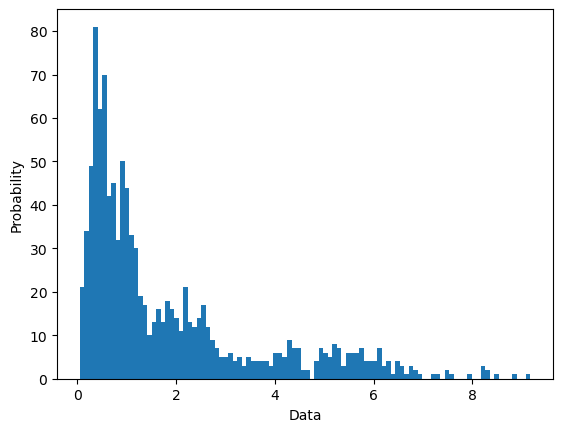

In [26]:
dist = df['metro_dist'].values
plt.hist(dist, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [27]:
df = df[df['metro_dist'] < 1]

In [28]:
df = df[df['rest_index_norm'] > df['rest_index_norm'].mean()]
df = df[df['attr_index_norm'] > df['attr_index_norm'].mean()]
df = df[df['guest_satisfaction_overall'] > df['guest_satisfaction_overall'].mean()]
df = df[df['bedrooms']==1]

In [29]:
len(df)

43

In [30]:
df = df[df['realSum'] < df['realSum'].quantile(.5)]

In [31]:
len(df)

21

**Find the object closest to Buckingham Palace**

In [58]:
coordinates = df[['lng','lat']].apply(tuple, axis=1).values
coordinates

array([(-0.14811, 51.54386), (-0.06856, 51.50065), (-0.07056, 51.51065),
       (-0.1388599999999999, 51.53616), (-0.13597, 51.53437),
       (-0.0763799999999999, 51.49726), (-0.08573, 51.52473),
       (-0.11696, 51.53195), (-0.08565, 51.52662), (-0.067, 51.512),
       (-0.10535, 51.49149), (-0.06071, 51.51166), (-0.11085, 51.49058),
       (-0.11715, 51.48874), (-0.0898, 51.49849), (-0.08982, 51.48852),
       (-0.09125, 51.48732), (-0.06195, 51.50642), (-0.09117, 51.48759),
       (-0.06523, 51.51725), (-0.06811, 51.51263)], dtype=object)

In [59]:
longitude_BP = -0.14194
latitude_BP = 51.50083

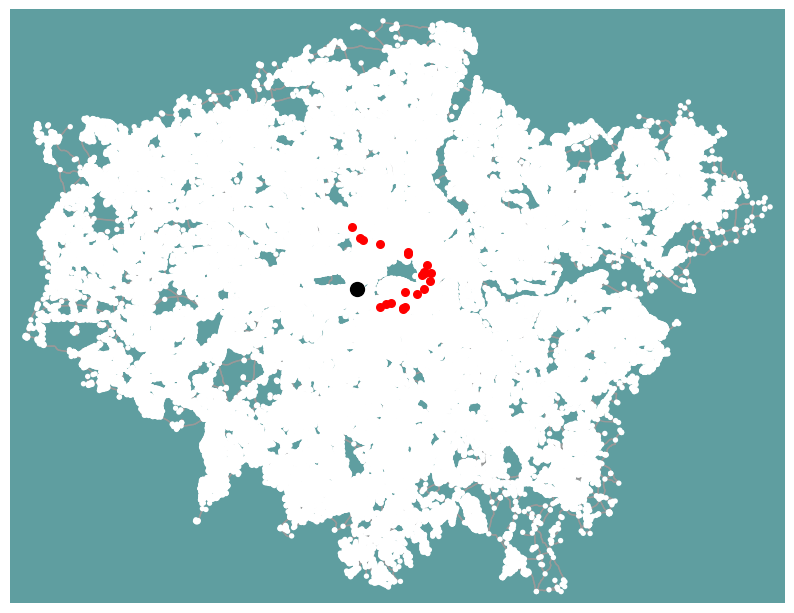

In [60]:
fig, ax = ox.plot_graph( G, figsize=(10, 10), bgcolor='#5F9EA0', show=False, close=False )

ax.scatter( longitude, latitude, c='red', s=30 )
ax.scatter( longitude_BP, latitude_BP, c='black', s=100 )

plt.show()

In [61]:
nearest_edge_BP = ox.distance.nearest_edges(G, longitude_BP, latitude_BP, interpolate=None, return_dist=False)
nearest_edge_BP

(108283, 25524224, 0)

In [62]:
nearest_edges = ox.distance.nearest_edges(G, longitude, latitude)

In [63]:
len(list(G))

127877

Put the one way

In [64]:
route = nx.shortest_path(G, nearest_edge_BP[0], nearest_edges[0][0])

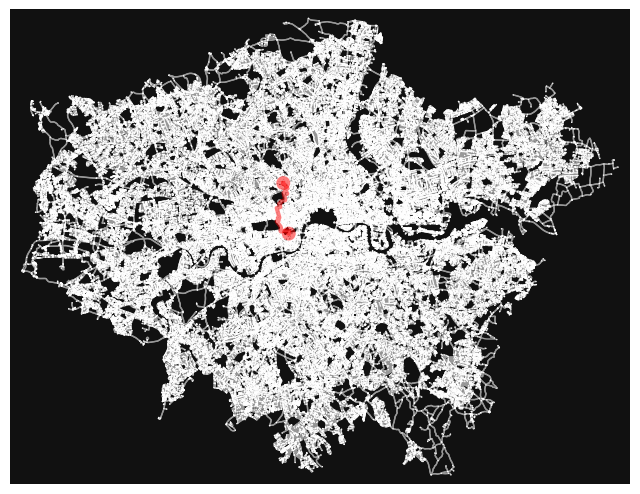

In [71]:
fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=1)

In [72]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [79]:
route_length = int(sum( ox.utils_graph.route_to_gdf(G, route, weight='length') ))
route_time = int(sum(ox.utils_graph.route_to_gdf(G, route, weight='travel_time')))

print('Route  is', route_length, 'meters and takes', route_time, 'seconds.')

TypeError: unsupported operand type(s) for +: 'int' and 'str'